Text(0.5, 1.0, 'Original')

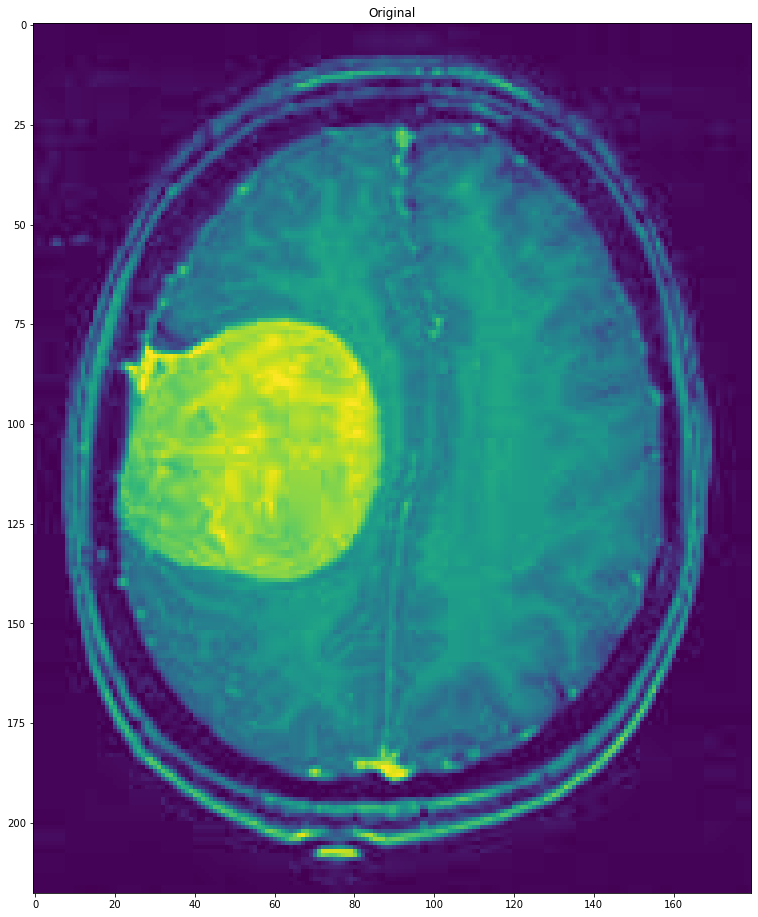

In [1]:
from skimage.io import imread,imshow,imsave
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

im = imread('mri_brain.jpg')

im_gray = rgb2gray(im)

plt.figure(figsize=(16,16))
plt.imshow(im_gray)
plt.title('Original')


Text(0.5, 1.0, 'Filtered')

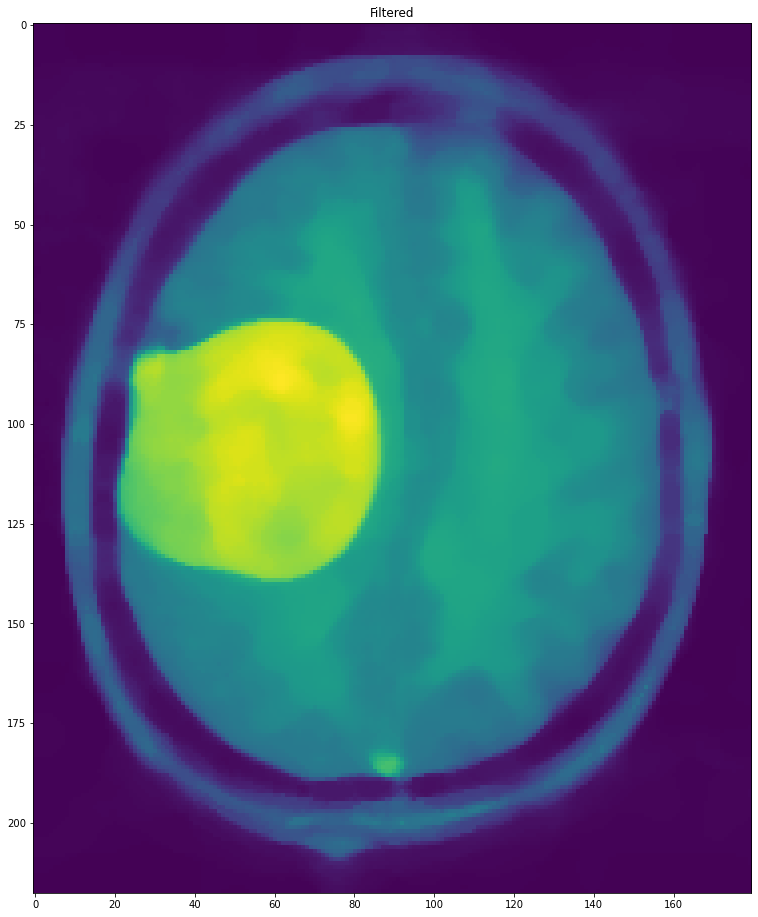

In [7]:
from skimage.filters.rank import median,gradient
from skimage.morphology import disk

im2 = median(im_gray,disk(5))

plt.figure(figsize=(16,16))
plt.imshow(im2)
plt.title('Filtered')

<BarContainer object of 256 artists>

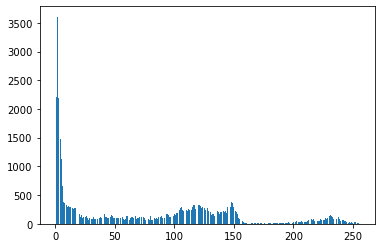

In [3]:
hist, bins = np.histogram(im2,256)


plt.figure()
plt.bar(range(256),hist)

Text(0.5, 1.0, 'mask')

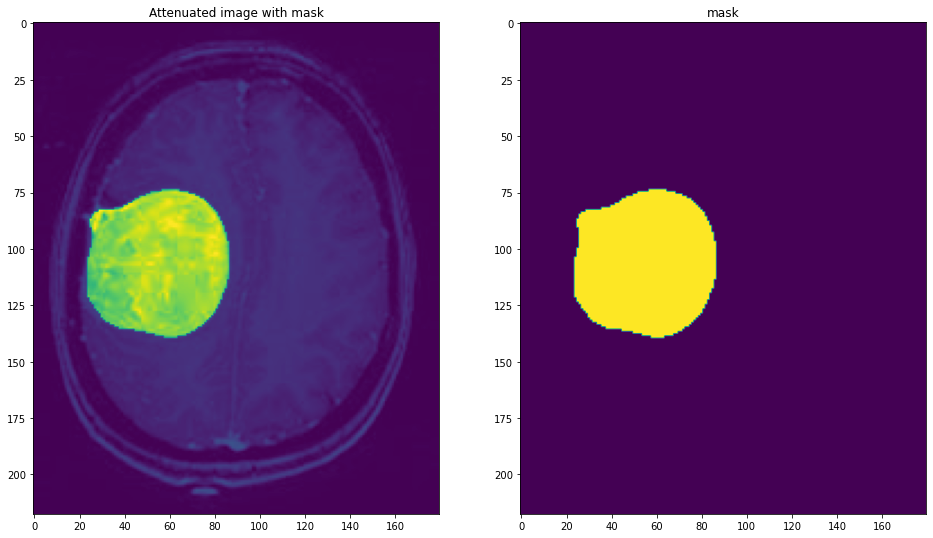

In [4]:
mask = im2.copy()
mask[mask<176] = 0
mask[mask!=0] = 255

im3 = im_gray.copy()
im3[mask==0] = im3[mask==0]/4


plt.figure(figsize=(16,16))
plt.subplot(1,2,1)
plt.imshow(im3)
plt.title('Attenuated image with mask')
plt.subplot(1,2,2)
plt.imshow(mask)
plt.title('mask')

In [6]:
surface = (mask.sum()/255)*0.115*0.115
print('Surface = ',surface)

Surface =  44.766625000000005


Surface =  45.91720000000001


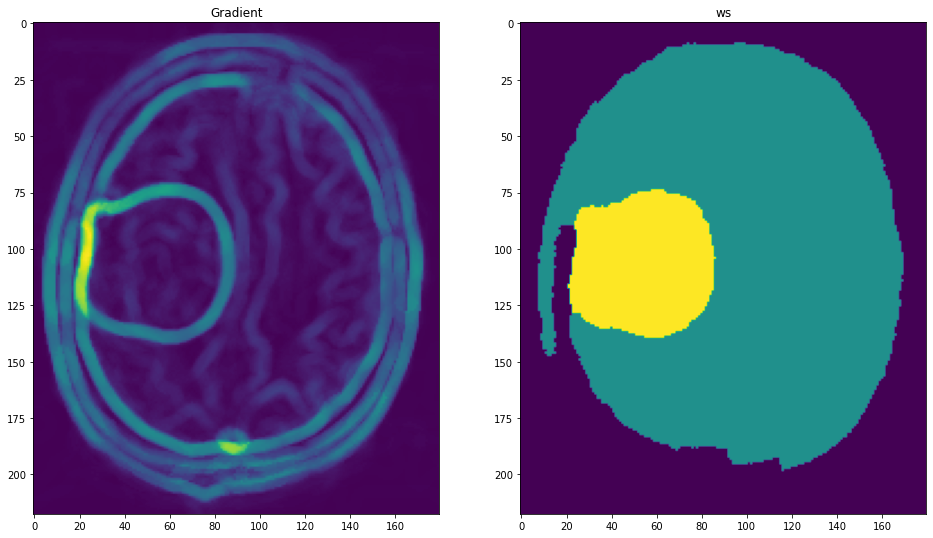

In [41]:
#Faire version avec région de croissance
from skimage.morphology import watershed

grad = gradient(im2,disk(3))

markers = np.zeros_like(rgb2gray(im))

markers[20,20] = 1 #background
markers[100,120] = 2 #Brain
markers[100,50] = 3 #Tumor

ws = watershed(grad, markers)

plt.figure(figsize=(16,16))
plt.subplot(1,2,1)
plt.imshow(grad)
plt.title('Gradient')
plt.subplot(1,2,2)
plt.imshow(ws)
plt.title('ws')

surface2 = (ws[ws==3].sum()/3)*0.115*0.115
print('Surface = ',surface2)

5


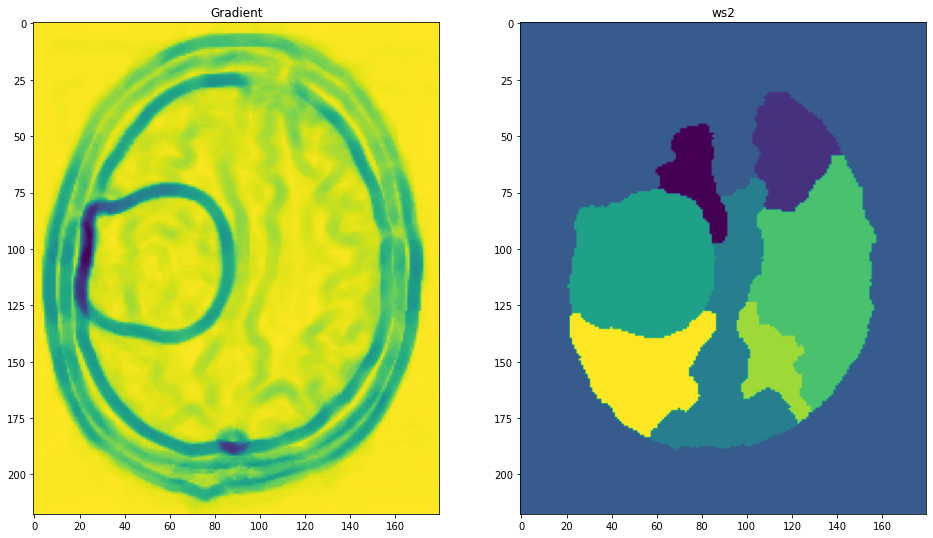

In [40]:
from skimage.measure import label
from skimage.feature import peak_local_max

grad_i = grad.max()-grad
markers2 = label(peak_local_max(grad_i, indices=False, threshold_rel=0.8, min_distance=28))
ws2 = watershed(grad, markers2)

plt.figure(figsize=(16,16))
plt.subplot(1,2,1)
plt.imshow(grad_i)
plt.title('Gradient')
plt.subplot(1,2,2)
plt.imshow(ws2)
plt.title('ws2')

In [43]:
surface3 = (ws2[ws2==ws2[100,50]].sum()/ws2[100,50])*0.115*0.115
print('Surface = ',surface3)

Surface =  45.91720000000001
